# **`load dataset --> final.csv`**

 



In [6]:
# read dataset
import pandas as pd 

# load all users
all_data = pd.read_csv('/content/drive/My Drive/final.csv')

# get data for one random user
data = all_data.loc[all_data['UserId'] == 0]
data.head(2)

,Unnamed: 0,UserId,ProductNo,Crawler,SearchWords,Image,url,ImageSource,SiteClothesHeadline,Color,Gender,Brand,Metadata,ProductCategory,ProductSubcategory,Length,Sleeve,CollarDesign,NeckDesign,Fit,gradeSystem,clicks,gradeUser,favorite,dashboard
0,0,0,0,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/in-the-style/in-the-style...,https://images.asos-media.com/products/in-the-...,In The Style x Billie Faiers motif t shirt and...,White,WOMAN,In The Style,Collaboration with influencer Billie Faiers - ...,SET,"SHIRT,T-SHIRT",SHORT LENGTH,SHORT SLEEVE,NO COLLAR,ROUND NECK,RELAXED FIT,0,1,5,0,1
1,1,0,1,Asos,SHORTSET,/home/alexandros/Desktop/createCsvDiplo/AsosIm...,https://www.asos.com/bluebella/bluebella-abiga...,https://images.asos-media.com/products/bluebel...,Bluebella Abigail Satin Short Pyjama Set,Pink,WOMAN,BlueBella,You’re invited to this PJ party - Notch lapels...,SET,SET,SHORT LENGTH,SHORT SLEEVE,POLO COLLAR,COLLAR,REGULAR FIT,1,1,8,1,0


# **`functions used for pre-processing`**

---





In [9]:
 
def lower_dimension_frame2(dataset,attr):
  # initialize category array
  categories = []
  for att in attr:
    # get all unique categories, split them from comma
    for i in dataset[att].unique():
      if type(i) == float:
        i = 'NAN'
      splited_ = re.split('/|,|to|and| |&|-|',i)
      splited_ = [x.lower() for x in splited_]
      for j in range(len(splited_)):
        if splited_[j] not in categories:
          categories.append(splited_[j])

  # create a new array that contains all those categories
  result_frame = pd.DataFrame()
  result_array = np.zeros((len(dataset[attr]),len(categories)))
  for att in attr:
    for i in range(len(dataset[att])):
      if type(dataset[att].tolist()[i]) == float:
        splited_ = 'NAN'.split('/')
      else:
        splited_ = re.split('/|,|to|and| |&|-|',dataset[att].tolist()[i])
        splited_ = [x.lower() for x in splited_]
      for j in range(len(splited_)):
        for k in range(len(categories)):
          if splited_[j] == categories[k]:
            result_array[i][k] = 1

  result_frame = pd.DataFrame(result_array,
                    columns= categories)


  index_frame = dataset['ProductNo'].tolist()
  result_frame['index'] = index_frame
  result_frame = result_frame.set_index('index')
  return result_frame


def lower_dimension_frame(dataset,attr):
  # initialize category array
  categories = []
  for att in attr:
    # get all unique categories, split them from comma
    for i in dataset[att].unique():
      if type(i) == float:
        i = 'NAN'
      splited_ = i.split(',')
      for j in range(len(splited_)):
        if splited_[j] not in categories:
          categories.append(splited_[j])

  # create a new array that contains all those categories
  result_frame = pd.DataFrame()
  result_array = np.zeros((len(dataset[attr]),len(categories)))
  for att in attr:
    for i in range(len(dataset[att])):
      if type(dataset[att].tolist()[i]) == float:
        splited_ = 'NAN'.split(',')
      else:
        splited_ = dataset[att].tolist()[i].split(',')
      for j in range(len(splited_)):
        for k in range(len(categories)):
          if splited_[j] == categories[k]:
            result_array[i][k] = 1

  result_frame = pd.DataFrame(result_array,
                    columns= categories)


  index_frame = dataset['ProductNo'].tolist()
  result_frame['index'] = index_frame
  result_frame = result_frame.set_index('index')
  return result_frame

def user_input_dataset():
  # load dataset to temporary variable
  temp_dataset = data

  # available search words in dataset
  all_searchWords = data['SearchWords'].tolist()

  # make search words to lower case
  all_searchWords = [x.lower() for x in all_searchWords]

  # remove duplicate search words
  all_searchWords = set(all_searchWords)

  # info about search words
  print('There are total: ',len(all_searchWords),' search words ')

  # user searching clothes category
  input_searchWords = input("Please enter your search words:  ")

  # user searching clothes category
  numOf_relatedWords = input("Please enter the number of releated words we wanna search :  ")
  numOf_relatedWords = int(numOf_relatedWords)

  # find matches based on dataset searchwords
  matches = difflib.get_close_matches(input_searchWords, all_searchWords, numOf_relatedWords )

  # print matches
  print('Result found: ',matches)

  # merge result of matches
  dataFrames = []
  for i in matches:
    dataFrames.append(data.loc[data['SearchWords'] == i.upper()])

  # all available clothes based on user search
  totalClothes = pd.concat(dataFrames)

  temp_dataset = totalClothes

  return temp_dataset

def frame_merger(dataset):
  merged_frame = pd.merge(prod_frame,fit_frame,on='index')
  #merged_frame = pd.merge(merged_frame,length_frame,on='index')
  #merged_frame = pd.merge(merged_frame,color_frame,on='index')
  merged_frame = pd.merge(merged_frame,neck_frame,on='index')
  merged_frame = pd.merge(merged_frame,sleeve_frame,on='index')
  merged_frame = pd.merge(merged_frame,search_word_Dataframe,on='index')
  merged_frame['url'] = dataset['ImageSource'].tolist()
  merged_frame['gradeSystem'] = dataset['gradeSystem'].tolist()
  merged_frame['grade'] = dataset['gradeUser'].tolist()
  
  #merged_frame['dashboard'] = dataset['dashboard'].tolist()
  #merged_frame['favorite'] = dataset['favorite'].tolist()
  #merged_frame['clicks'] = dataset['clicks'].tolist()
  url_all = merged_frame['url']
  grades_all = merged_frame['grade'].tolist()
  grade_sys = merged_frame['gradeSystem'].tolist()
  merged_frame = merged_frame.drop(['grade'],axis=1)
  merged_frame = merged_frame.drop(['gradeSystem'],axis=1)
  merged_frame = merged_frame.drop(['url'],axis=1)
  return merged_frame,grades_all,grade_sys,url_all
 

# **`preprocessing data`**

In [11]:
import numpy as np

## **`Preprocessing Color`**

Reduced categories from 881 to 569

In [13]:

color_frame = lower_dimension_frame2(data,['Color'])

color_frame.head(3)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


,white,pink,multi,black,,safari,print,petrol,blue,mint,lilac,beige,cordovan,antique,watermelon,grey,light,red,yellow,peach,olive,green,rose,ivory,navy,watercolour,floral,no,colour,monster,mattes,large,it,up,big,love,medium,dark,deep,neutral,...,waist,mu1,aries,bk,com,care,marsala,beetroot,excalibur,latte,mini,bloom,grapefruit,bluebell,brick,rainbow,jaquard,ducky,nal,jetst,flclover,tonal,ombre,meadow,pine,armory,shiny,str,001,taylor,p,fu,auburn,acid,paisley,pretty,72,arctic,grape,faded
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
len(data['Color'].unique())

881

In [15]:
len(np.array(color_frame.columns))


569

## **`Preprocessing Fit`**

Reduced categories from 16 to 5

In [16]:
 
fit_frame = lower_dimension_frame(data,['Fit'])

fit_frame.head(3)

,RELAXED FIT,REGULAR FIT,SLIM FIT,CARGO,BIKER
index,,,,,
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [17]:
len(all_data['Fit'].unique())

16

In [18]:
len(fit_frame.columns)

5

## **`Preprocessing Neck Design`**

Reduced categories from 20 to 7

In [19]:
 
neck_frame = lower_dimension_frame(data,['NeckDesign'])

neck_frame.head(2)

,ROUND NECK,COLLAR,V NECK,HOODED,OFF SHOULDER,HALTERNECK,TURTLENECK
index,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
all_data['NeckDesign'].nunique()

20

In [21]:
len(neck_frame.columns)

7

## **`Preprocessing Length`**

Reduced categories from 7 to 6

In [22]:
 
length_frame = lower_dimension_frame(data,['Length'])
length_frame.head(2)

,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH
index,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
len(all_data['Length'].unique())

7

In [24]:
len(length_frame.columns)

6

## **`Preprocessing Product Category & SubCategory`**

Reduced categories from 179 to 33

In [25]:
 
# 'ProductCategory','ProductSubcategory'
prod_frame = lower_dimension_frame(data,['ProductCategory','ProductSubcategory'])
prod_frame.head(2)


,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(data['ProductSubcategory'].unique())+ len(data['ProductCategory'].unique())

179

In [27]:
len(prod_frame.columns)

33

## **`Preprocessing Search Words`**

Because every cloth can have multiple search words

the following code adjust every searchword for all of the clothes

In [28]:
su = all_data.loc[all_data['UserId'] == 0]
single_user_data = su.copy()
unique_search_words = single_user_data['SearchWords'].unique()
future_frame = []
for i in single_user_data['ImageSource'].tolist():
  z_array = np.zeros((1,len(unique_search_words)))
  local_sw = su.loc[su['ImageSource'] == i]['SearchWords'].tolist()
  #print(local_sw)
  for j in range(len(unique_search_words)):
    for k in range(len(local_sw)):
      if local_sw[k] == unique_search_words[j]:
        #print(local_sw[k])
        z_array[0][j] = 1
  future_frame.append(z_array)


In [30]:
future_frame = np.array(future_frame).squeeze()
search_word_Dataframe = pd.DataFrame(data=future_frame,columns=unique_search_words)
index = prod_frame.index.tolist()
search_word_Dataframe['index'] = index
search_word_Dataframe = search_word_Dataframe.set_index(keys='index')
len(np.array(search_word_Dataframe.columns.tolist()))

360

# **`merge all features of every category`**

In [43]:
merged = pd.merge(prod_frame,length_frame,on='index')
merged = pd.merge(merged,search_word_Dataframe,on='index')
merged = pd.merge(merged,fit_frame,on='index')
merged = pd.merge(merged,neck_frame,on='index')
#-------------
#-------------
# merging color is optional
#-------------
#-------------
#merged = pd.merge(merged,color_frame,on='index')


dataset = data.drop_duplicates(subset='ImageSource',keep='first')

index = dataset['ProductNo'].tolist()
 
merged = merged.loc[index]
merged = merged.reset_index()
merged = merged.drop(columns='index')
merged

# 4325 clothes in total with 411 features (without color)

,SET,PYJAMAS,SKIRT,NAN,DRESS,TROUSERS,LEGGINGS,TRACKSUIT,CARDIGAN,ROMPER,SHIRTS,SHIRT,T-SHIRT,SHORT SET,TOP,JOGGERS,SKIRT SET,JACKET,SHORTS,BLOUSE,VEST,JEANS,SWEATSHIRT,BIKINI,BERMUDA SHORTS,JUMPSUIT,DUNGAREES,PLAYSUIT,SLEEVELESS BLOUSE,BOMBER JACKET,BLAZER,TUNIC,SWIMSUIT,SHORT LENGTH,MEDIUM LENGTH,KNEE LENGTH,LONG,CAPRI,3/4 LENGTH,SHORTSET,...,OFFSHOULDERSWIMMINGSUITS,HALTERNECKSWIMMINGSUITS,SHORTPYJAMAS,LONGPYJAMAS,MEDIUMPYJAMAS,KNEEPYJAMAS,CAPRIPYJAMAS,3/4LENGTHPYJAMAS,SHORTSLEEVEPYJAMAS,LONGSLEEVEPYJAMAS,TURNUPSLEEVEPYJAMAS,SLEEVELESSPYJAMAS,RAGLANSLEEVEPYJAMAS,CUPSLEEVEPYJAMAS,3/4FLAREDPYJAMAS,FLAREDPYJAMAS,POLOCOLLARPYJAMAS,SHIRTCOLLARPYJAMAS,FLATKNITTEDRIBPYJAMAS,MAOCOLLARPYJAMAS,STANDUPCOLLARPYJAMAS,ROUNDNECKPYJAMAS,COLLARPYJAMAS,TURTLENECKPYJAMAS,HOODEDPYJAMAS,VNECKPYJAMAS,OFFSHOULDERPYJAMAS,HALTERNECKPYJAMAS,RELAXED FIT,REGULAR FIT,SLIM FIT,CARGO,BIKER,ROUND NECK,COLLAR,V NECK,HOODED,OFF SHOULDER,HALTERNECK,TURTLENECK
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4323,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# **`filtering clothes`**

## **`filter by category`**

### **`pyjama`**

In [44]:
items = []
for i in merged.columns:
  if 'PYJAMAS' in i:
    items.append(i)
pyjama_items = items
pyjama_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(pyjama_index ),items)

489 ['PYJAMAS', 'SHORTPYJAMAS', 'LONGPYJAMAS', 'MEDIUMPYJAMAS', 'KNEEPYJAMAS', 'CAPRIPYJAMAS', '3/4LENGTHPYJAMAS', 'SHORTSLEEVEPYJAMAS', 'LONGSLEEVEPYJAMAS', 'TURNUPSLEEVEPYJAMAS', 'SLEEVELESSPYJAMAS', 'RAGLANSLEEVEPYJAMAS', 'CUPSLEEVEPYJAMAS', '3/4FLAREDPYJAMAS', 'FLAREDPYJAMAS', 'POLOCOLLARPYJAMAS', 'SHIRTCOLLARPYJAMAS', 'FLATKNITTEDRIBPYJAMAS', 'MAOCOLLARPYJAMAS', 'STANDUPCOLLARPYJAMAS', 'ROUNDNECKPYJAMAS', 'COLLARPYJAMAS', 'TURTLENECKPYJAMAS', 'HOODEDPYJAMAS', 'VNECKPYJAMAS', 'OFFSHOULDERPYJAMAS', 'HALTERNECKPYJAMAS']


### **`shorts`**

In [45]:
items = []
for i in merged.columns:
  if 'SHORTS' in i:
    items.append(i)
shorts_items = items
shorts_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(shorts_index ),items)

865 ['SHORTS', 'BERMUDA SHORTS', 'SHORTSET', 'SHORTSLEEVESET', 'SHORTBERMUDAS-SHORTS', 'LONGBERMUDAS-SHORTS', 'MEDIUMBERMUDAS-SHORTS', 'KNEEBERMUDAS-SHORTS', 'CAPRIBERMUDAS-SHORTS', '3/4LENGTHBERMUDAS-SHORTS', 'SHORTSLEEVEBERMUDAS-SHORTS', 'LONGSLEEVEBERMUDAS-SHORTS', 'TURNUPSLEEVEBERMUDAS-SHORTS', 'SLEEVELESSBERMUDAS-SHORTS', 'RAGLANSLEEVEBERMUDAS-SHORTS', 'CUPSLEEVEBERMUDAS-SHORTS', '3/4FLAREDBERMUDAS-SHORTS', 'FLAREDBERMUDAS-SHORTS', 'POLOCOLLARBERMUDAS-SHORTS', 'SHIRTCOLLARBERMUDAS-SHORTS', 'FLATKNITTEDRIBBERMUDAS-SHORTS', 'MAOCOLLARBERMUDAS-SHORTS', 'STANDUPCOLLARBERMUDAS-SHORTS', 'ROUNDNECKBERMUDAS-SHORTS', 'COLLARBERMUDAS-SHORTS', 'TURTLENECKBERMUDAS-SHORTS', 'HOODEDBERMUDAS-SHORTS', 'VNECKBERMUDAS-SHORTS', 'OFFSHOULDERBERMUDAS-SHORTS', 'HALTERNECKBERMUDAS-SHORTS', 'SHORTSLEEVEBLOUSES', 'SHORTSLEEVETROUSERS', 'SHORTSLEEVEROMPER', 'SHORTSHIRTS', 'SHORTSLEEVESHIRTS', 'SHORTSLEEVEOUTDOORCLOTHINGORCOAT', 'SHORTSLEEVECARDIGAN', 'SHORTSLEEVETRACKSUIT', 'SHORTSLEEVEDRESS', 'SHORTSLEEVE

### **`skirt`**

In [46]:
items = []
for i in merged.columns:
  if 'SKIRT' in i:
    items.append(i)
skirt_items = items
skirt_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(skirt_index ),items)


483 ['SKIRT', 'SKIRT SET', 'SHORTSKIRT', 'LONGSKIRT', 'MEDIUMSKIRT', 'KNEESKIRT', 'CAPRISKIRT', 'SHORTSLEEVESKIRT', 'LONGSLEEVESKIRT', 'TURNUPSLEEVESKIRT', 'SLEEVELESSSKIRT', 'RAGLANSLEEVESKIRT', 'CUPSLEEVESKIRT', '3/4FLAREDSKIRT', 'FLAREDSKIRT', 'POLOCOLLARSKIRT', 'SHIRTCOLLARSKIRT', 'FLATKNITTEDRIBSKIRT', 'MAOCOLLARSKIRT', 'STANDUPCOLLARSKIRT', 'ROUNDNECKSKIRT', 'COLLARSKIRT', 'TURTLENECKSKIRT', 'HOODEDSKIRT', 'VNECKSKIRT', 'OFFSHOULDERSKIRT', 'HALTERNECKSKIRT']


### **`dress`**

In [47]:
items = []
for i in merged.columns:
  if 'DRESS' in i:
    items.append(i)
dress_items = items
dress_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(dress_index ),items)

1162 ['DRESS', 'SHORTDRESS', 'LONGDRESS', 'MEDIUMDRESS', 'KNEEDRESS', 'CAPRIDRESS', '3/4LENGTHDRESS', 'SHORTSLEEVEDRESS', 'LONGSLEEVEDRESS', 'TURNUPSLEEVEDRESS', 'SLEEVELESSDRESS', 'RAGLANSLEEVEDRESS', 'CUPSLEEVEDRESS', '3/4FLAREDDRESS', 'FLAREDDRESS', 'POLOCOLLARDRESS', 'SHIRTCOLLARDRESS', 'FLATKNITTEDRIBDRESS', 'MAOCOLLARDRESS', 'STANDUPCOLLARDRESS', 'ROUNDNECKDRESS', 'COLLARDRESS', 'TURTLENECKDRESS', 'HOODEDDRESS', 'VNECKDRESS', 'OFFSHOULDERDRESS', 'HALTERNECKDRESS']


### **`trousers`**

In [48]:
items = []
for i in merged.columns:
  if 'TROUSERS' in i:
    items.append(i)
trousers_items = items
trousers_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(trousers_index ),items)

600 ['TROUSERS', 'SHORTTROUSERS', 'LONGTROUSERS', 'MEDIUMTROUSERS', 'KNEETROUSERS', 'CAPRITROUSERS', '3/4LENGTHTROUSERS', 'SHORTSLEEVETROUSERS', 'LONGSLEEVETROUSERS', 'TURNUPSLEEVETROUSERS', 'SLEEVELESSTROUSERS', 'RAGLANSLEEVETROUSERS', 'CUPSLEEVETROUSERS', '3/4FLAREDTROUSERS', 'FLAREDTROUSERS', 'POLOCOLLARTROUSERS', 'SHIRTCOLLARTROUSERS', 'FLATKNITTEDRIBTROUSERS', 'MAOCOLLARTROUSERS', 'STANDUPCOLLARTROUSERS', 'ROUNDNECKTROUSERS', 'COLLARTROUSERS', 'TURTLENECKTROUSERS', 'HOODEDTROUSERS', 'VNECKTROUSERS', 'HALTERNECKTROUSERS']


### **`shirts`**

In [49]:
items = []
for i in merged.columns:
  if 'SHIRT' in i:
    items.append(i)
shirt_items = items
shirt_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(shirt_index ),items)

1141 ['SHIRTS', 'SHIRT', 'T-SHIRT', 'SWEATSHIRT', 'SHIRTCOLLARSET', 'SHIRTCOLLARBERMUDAS-SHORTS', 'SHIRTCOLLARBLOUSES', 'SHIRTCOLLARTROUSERS', 'SHIRTCOLLARROMPER', 'SHORTSHIRTS', 'LONGSHIRTS', 'MEDIUMSHIRTS', 'KNEESHIRTS', 'CAPRISHIRTS', '3/4LENGTHSHIRTS', 'SHORTSLEEVESHIRTS', 'LONGSLEEVESHIRTS', 'TURNUPSLEEVESHIRTS', 'SLEEVELESSSHIRTS', 'RAGLANSLEEVESHIRTS', 'CUPSLEEVESHIRTS', '3/4FLAREDSHIRTS', 'FLAREDSHIRTS', 'POLOCOLLARSHIRTS', 'SHIRTCOLLARSHIRTS', 'FLATKNITTEDRIBSHIRTS', 'MAOCOLLARSHIRTS', 'STANDUPCOLLARSHIRTS', 'ROUNDNECKSHIRTS', 'COLLARSHIRTS', 'TURTLENECKSHIRTS', 'HOODEDSHIRTS', 'VNECKSHIRTS', 'OFFSHOULDERSHIRTS', 'HALTERNECKSHIRTS', 'SHIRTCOLLAROUTDOORCLOTHINGORCOAT', 'SHIRTCOLLARCARDIGAN', 'SHIRTCOLLARTRACKSUIT', 'SHIRTCOLLARDRESS', 'SHIRTCOLLARLEGGINGS', 'SHIRTCOLLARSKIRT', 'SHIRTCOLLARSWIMMINGSUITS', 'SHIRTCOLLARPYJAMAS']


### **`leggings`**

In [50]:
items = []
for i in merged.columns:
  if 'LEGGINGS' in i:
    items.append(i)
leg_items = items
leg_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
len(leg_index)

538

### **`swimming suit`**

In [51]:
items = []
for i in merged.columns:
  if 'SWIMMING' in i:
    items.append(i)
    
    ## to much noise here
items.remove('TURNUPSLEEVESWIMMINGSUITS')
items.remove('FLAREDSWIMMINGSUITS')
items.remove('MAOCOLLARSWIMMINGSUITS')
items.remove('STANDUPCOLLARSWIMMINGSUITS')
items.remove('COLLARSWIMMINGSUITS')
sw_items = items

sw_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
len(sw_index)

319

### **`romper`**

In [52]:
items = []
for i in merged.columns:
  if 'ROMPER' in i:
    items.append(i)
ro_items = items
ro_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(ro_index),ro_items)

445 ['ROMPER', 'SHORTROMPER', 'LONGROMPER', 'MEDIUMROMPER', 'KNEEROMPER', 'CAPRIROMPER', '3/4LENGTHROMPER', 'SHORTSLEEVEROMPER', 'LONGSLEEVEROMPER', 'TURNUPSLEEVEROMPER', 'SLEEVELESSROMPER', 'RAGLANSLEEVEROMPER', 'CUPSLEEVEROMPER', '3/4FLAREDROMPER', 'FLAREDROMPER', 'POLOCOLLARROMPER', 'SHIRTCOLLARROMPER', 'FLATKNITTEDRIBROMPER', 'MAOCOLLARROMPER', 'STANDUPCOLLARROMPER', 'ROUNDNECKROMPER', 'COLLARROMPER', 'TURTLENECKROMPER', 'HOODEDROMPER', 'VNECKROMPER', 'OFFSHOULDERROMPER', 'HALTERNECKROMPER']


### **`coat`**

In [53]:
items = []
for i in merged.columns:
  if 'COAT' in i:
    items.append(i)
coat_items = items
coat_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(coat_index),coat_items)

386 ['SHORTOUTDOORCLOTHINGORCOAT', 'LONGOUTDOORCLOTHINGORCOAT', 'MEDIUMOUTDOORCLOTHINGORCOAT', 'KNEEOUTDOORCLOTHINGORCOAT', 'CAPRIOUTDOORCLOTHINGORCOAT', '3/4LENGTHOUTDOORCLOTHINGORCOAT', 'SHORTSLEEVEOUTDOORCLOTHINGORCOAT', 'LONGSLEEVEOUTDOORCLOTHINGORCOAT', 'TURNUPSLEEVEOUTDOORCLOTHINGORCOAT', 'SLEEVELESSOUTDOORCLOTHINGORCOAT', 'RAGLANSLEEVEOUTDOORCLOTHINGORCOAT', 'CUPSLEEVEOUTDOORCLOTHINGORCOAT', '3/4FLAREDOUTDOORCLOTHINGORCOAT', 'FLAREDOUTDOORCLOTHINGORCOAT', 'POLOCOLLAROUTDOORCLOTHINGORCOAT', 'SHIRTCOLLAROUTDOORCLOTHINGORCOAT', 'FLATKNITTEDRIBOUTDOORCLOTHINGORCOAT', 'MAOCOLLAROUTDOORCLOTHINGORCOAT', 'STANDUPCOLLAROUTDOORCLOTHINGORCOAT', 'ROUNDNECKOUTDOORCLOTHINGORCOAT', 'COLLAROUTDOORCLOTHINGORCOAT', 'TURTLENECKOUTDOORCLOTHINGORCOAT', 'HOODEDOUTDOORCLOTHINGORCOAT', 'VNECKOUTDOORCLOTHINGORCOAT', 'OFFSHOULDEROUTDOORCLOTHINGORCOAT', 'HALTERNECKOUTDOORCLOTHINGORCOAT']


### **`cardigan`**

In [54]:
items = []
for i in merged.columns:
  if 'CARDIGAN' in i:
    items.append(i)
cardigan_items = items
cardigan_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(cardigan_index),cardigan_items)

417 ['CARDIGAN', 'SHORTCARDIGAN', 'LONGCARDIGAN', 'MEDIUMCARDIGAN', 'KNEECARDIGAN', 'CAPRICARDIGAN', '3/4LENGTHCARDIGAN', 'SHORTSLEEVECARDIGAN', 'LONGSLEEVECARDIGAN', 'TURNUPSLEEVECARDIGAN', 'RAGLANSLEEVECARDIGAN', 'CUPSLEEVECARDIGAN', '3/4FLAREDCARDIGAN', 'FLAREDCARDIGAN', 'POLOCOLLARCARDIGAN', 'SHIRTCOLLARCARDIGAN', 'FLATKNITTEDRIBCARDIGAN', 'MAOCOLLARCARDIGAN', 'STANDUPCOLLARCARDIGAN', 'ROUNDNECKCARDIGAN', 'COLLARCARDIGAN', 'TURTLENECKCARDIGAN', 'HOODEDCARDIGAN', 'VNECKCARDIGAN', 'OFFSHOULDERCARDIGAN', 'HALTERNECKCARDIGAN']


### **`blouses`**

In [56]:

items = []
for i in merged.columns:
  if 'BLOUSES' in i:
    items.append(i)
blou_items = items
blou_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(blou_index),blou_items)

435 ['SHORTBLOUSES', 'LONGBLOUSES', 'MEDIUMBLOUSES', 'KNEEBLOUSES', 'CAPRIBLOUSES', '3/4LENGTHBLOUSES', 'SHORTSLEEVEBLOUSES', 'LONGSLEEVEBLOUSES', 'TURNUPSLEEVEBLOUSES', 'SLEEVELESSBLOUSES', 'RAGLANSLEEVEBLOUSES', 'CUPSLEEVEBLOUSES', '3/4FLAREDBLOUSES', 'FLAREDBLOUSES', 'POLOCOLLARBLOUSES', 'SHIRTCOLLARBLOUSES', 'FLATKNITTEDRIBBLOUSES', 'MAOCOLLARBLOUSES', 'STANDUPCOLLARBLOUSES', 'ROUNDNECKBLOUSES', 'COLLARBLOUSES', 'TURTLENECKBLOUSES', 'HOODEDBLOUSES', 'VNECKBLOUSES', 'OFFSHOULDERBLOUSES', 'HALTERNECKBLOUSES']


### **`tracksuit`**

In [55]:
items = []
for i in merged.columns:
  if 'TRACKSUIT' in i:
    items.append(i)
track_items = items
track_index = np.array(merged[merged[items].sum(axis=1)>=1].index.tolist())
print(len(track_index),track_items)

371 ['TRACKSUIT', 'SHORTTRACKSUIT', 'LONGTRACKSUIT', 'MEDIUMTRACKSUIT', 'KNEETRACKSUIT', 'CAPRITRACKSUIT', '3/4LENGTHTRACKSUIT', 'SHORTSLEEVETRACKSUIT', 'LONGSLEEVETRACKSUIT', 'TURNUPSLEEVETRACKSUIT', 'SLEEVELESSTRACKSUIT', 'RAGLANSLEEVETRACKSUIT', 'CUPSLEEVETRACKSUIT', '3/4FLAREDTRACKSUIT', 'FLAREDTRACKSUIT', 'POLOCOLLARTRACKSUIT', 'SHIRTCOLLARTRACKSUIT', 'FLATKNITTEDRIBTRACKSUIT', 'MAOCOLLARTRACKSUIT', 'STANDUPCOLLARTRACKSUIT', 'ROUNDNECKTRACKSUIT', 'COLLARTRACKSUIT', 'TURTLENECKTRACKSUIT', 'HOODEDTRACKSUIT', 'VNECKTRACKSUIT', 'OFFSHOULDERTRACKSUIT', 'HALTERNECKTRACKSUIT']


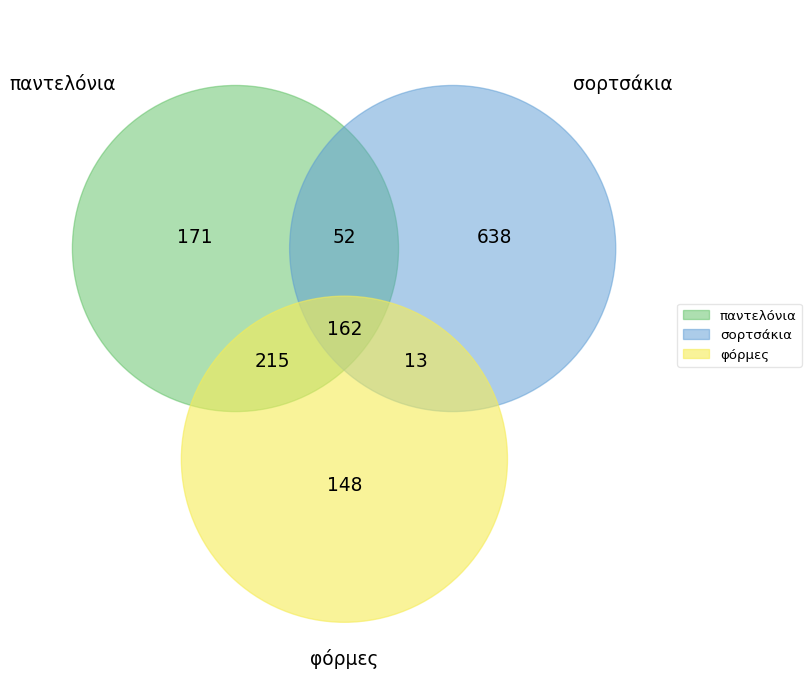

# **`filtering clothes `**

Here we keep only clothes that belong to one category

In [57]:
# PYJAMAS - done
only_py1 = set(pyjama_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(shorts_index)-set(track_index)
only_py2 = merged.loc[merged['PYJAMAS']>=1].index.tolist()
only_py = list(only_py1.union(only_py2) - set([3673]))
print(len(only_py))

110


In [58]:
# SKIRT + DRESS  - done
only_sd1 = (set(skirt_index) & set(dress_index)) - set(trousers_index) - set(shirt_index) - set(pyjama_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(shorts_index)-set(track_index)
only_sd2 = set(merged.loc[merged['SKIRT']>=1].index.tolist())
only_sd3 = set(merged.loc[merged['DRESS']>=1].index.tolist())
only_sd = only_sd1.union(only_sd2)
only_sd = list(only_sd.union(only_sd3))
print(len(only_sd))

1206


In [59]:
# SHORTS  - done
only_shorts1 = set(shorts_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(coat_index) - set(blou_index)-set(pyjama_index)-set(track_index)
only_shorts2 = set(merged.loc[merged['SHORTS']>=1].index.tolist())
only_shorts = list(only_shorts1.union(only_shorts2) - set([468]))

len(only_shorts)

197

In [60]:
# SWIMMING  - done
only_sw1 = set(sw_index) - set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(shorts_index) - set(coat_index) - set(blou_index)-set(pyjama_index)-set(track_index)
only_sw2 = merged[(merged['SWIMSUIT']>=1) | (merged['BIKINI']>=1)].index.tolist()
only_sw = list(only_sw1.union(only_sw2) - set([4023,4042,4043,4069,4079,4080,4083,4084,4085,4086,4087,4088]))

len(only_sw)

81

In [61]:
# TROUSERS - done
only_trousers = list(set(trousers_index) - set(shorts_index) - set(coat_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index)  - set(blou_index)-set(pyjama_index)-set(track_index))
only_trousers = merged.loc[only_trousers][merged.loc[only_trousers]['BIKINI']<1].index.tolist()
len(only_trousers)

213

In [62]:
# COATS  - done
only_coats = list(set(coat_index) - set([2201,2209,2210,2211,2212,2213,2215,2216,2218,2229])- set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index))
len(only_coats)

118

In [63]:
# ROMPER  - done
only_ro = list(set(ro_index) -set(trousers_index) - set(dress_index) - set(shirt_index) - set(skirt_index) - set(coat_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index)- set([1536,1540,1541,1543,1552,1553,1555,1556,1584,81,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1463,1464,1465,1466,1468,1469,1472,1480,1478,1481,1483,1528]))
len(only_ro)

187

In [64]:
# SHIRTS - done
only_shirts = list(set(shirt_index) - set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(blou_index)-set(pyjama_index)-set(track_index))
only_shirts =  merged.loc[only_shirts][merged.loc[only_shirts]['SHIRT']==1].index.tolist()
only_shirts = list(set(only_shirts) - set([2054,2065,2069,2077,2082,2108,2117,199,200,207,213,214,217,224,229,1989,1990,1992]))
len(only_shirts)

147

In [65]:
# BLOUS  - done
only_blou = list(set(blou_index) - set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(track_index)-set(pyjama_index)-set(shirt_index))
len(only_blou)

333

In [66]:
# leggings  - done
only_leg = list(set(leg_index) - set(blou_index)- set(trousers_index) - set(dress_index) - set(coat_index) - set(skirt_index) - set(ro_index)- set(cardigan_index)- set(sw_index) - set(shorts_index) - set(track_index)-set(pyjama_index)-set(shirt_index)- set([2201,2209,2210,2211,2212,2213,2215,2216,2218,2229])- set([2054,2065,2069,2077,2082,2108,2117,199,200,207,213,214,217,224,229,1989,1990,1992]) - set([142,146,387,3722,3721,3641,3671,3669,3668,3670,3635]))
len(only_leg)

105

# **`final dataframe with filtering `**

In [70]:
df = pd.DataFrame(columns=['id','category'])


for i in only_leg:
  df = df.append(pd.DataFrame(data=[[i,'leg']],columns=['id','category']))
for i in only_blou:
  df = df.append(pd.DataFrame(data=[[i,'blou']],columns=['id','category']))
for i in only_shirts:
  df = df.append(pd.DataFrame(data=[[i,'shirts']],columns=['id','category']))
for i in only_ro:
  df = df.append(pd.DataFrame(data=[[i,'ro']],columns=['id','category']))
for i in only_trousers:
  df = df.append(pd.DataFrame(data=[[i,'trousers']],columns=['id','category']))
for i in only_shorts:
  df = df.append(pd.DataFrame(data=[[i,'shorts']],columns=['id','category']))
for i in only_coats:
  df = df.append(pd.DataFrame(data=[[i,'coats']],columns=['id','category']))
for i in only_sw:
  df = df.append(pd.DataFrame(data=[[i,'sw']],columns=['id','category']))
for i in only_sd:
  df = df.append(pd.DataFrame(data=[[i,'sd']],columns=['id','category']))
for i in only_py:
  df = df.append(pd.DataFrame(data=[[i,'pyj']],columns=['id','category']))
df = df.reset_index()
df = df.drop(columns='index')

 
df.head(5)

,id,category
0,3586,leg
1,3587,leg
2,3589,leg
3,3590,leg
4,3592,leg
